In [1]:
import pandas as pd
from pandas import read_csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= read_csv("/content/drive/MyDrive/VeeSmart Internship/Data/Reviews.csv", header=None)

In [4]:
df.columns = df.iloc[0]
df_not_needed = pd.DataFrame(columns = df.columns)
df.drop(index=0,axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(4745, 6)

In [5]:
df.head()

,Resturant,RestoURL,Author,URL,Review,Rating
0,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Rania ELEID,https://www.zoma.to/lRaNYAX,NaN,5
1,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Mireille Wehbe,https://www.zoma.to/Rqnvzdm,If there is a rating of 6 stars i’d definitely...,5
2,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Yannis Bobikos,https://www.zoma.to/oQymZRE,Best burger you will eat in the whole country!...,5
3,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Yummy Tummy,https://www.zoma.to/geRgpZQ,"After many years,I have finally tried The Bros...",5
4,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Rhea,https://www.zoma.to/yXYrkZg,Gold digger hamburger (6/10) - bbq chicken bur...,4


In [6]:
df = df.drop_duplicates(subset = ['Author','Review'])
df.reset_index(drop=True, inplace=True)
df.shape

(4715, 6)

In [7]:
df.isnull().sum()

0
Resturant      0
RestoURL       0
Author         0
URL            0
Review       305
Rating         0
dtype: int64

In [8]:
row_index = [index for index, row in df.iterrows() if row.isnull().any()]
row_index.reverse()
for i in row_index:
  df_not_needed = df_not_needed.append(df.iloc[i])
  df.drop(index=i, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(4410, 6)

In [9]:
df.describe()

,Resturant,RestoURL,Author,URL,Review,Rating
count,4410,4410,4410,4410,4410,4410
unique,5,5,3460,4410,4407,9
top,Chili's,https://www.zomato.com/beirut/chilis-ashrafieh...,Candy Shop,https://www.zoma.to/zgvpKp,Perfect,5
freq,1139,1139,8,1,2,1658


In [10]:
def isNotEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except AttributeError:
      str(s).encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return True
    else:
        return False

cond=df[df['Author'].apply(isNotEnglish) | df['Rating'].apply(isNotEnglish) | df['Review'].apply(isNotEnglish)]
row_index = list(cond.index)
row_index.reverse()
for i in row_index:
  df_not_needed = df_not_needed.append(df.iloc[i])
  df.drop(index=i, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(3054, 6)

In [11]:
cond=df[df['Author'].str.isnumeric() | df['Rating'].str.isnumeric()==False | df['Review'].str.isnumeric()]
row_index = list(cond.index)
row_index.reverse()
for i in row_index:
  df_not_needed = df_not_needed.append(df.iloc[i])
  df.drop(index=i, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(2443, 6)

In [12]:
df_not_needed.head()

,Resturant,RestoURL,Author,URL,Review,Rating
3641,Chili's,https://www.zomato.com/beirut/chilis-ashrafieh...,Karen,https://www.zoma.to/APoYmb,NaN,5
3640,Chili's,https://www.zomato.com/beirut/chilis-ashrafieh...,Jade Ayoub,https://www.zoma.to/llKeGo,NaN,1
3638,Chili's,https://www.zomato.com/beirut/chilis-ashrafieh...,Yara Helou,https://www.zoma.to/wZPBYl,NaN,4
3635,Chili's,https://www.zomato.com/beirut/chilis-ashrafieh...,Habib Abboud,https://www.zoma.to/dGYEyq,NaN,5
3633,Chili's,https://www.zomato.com/beirut/chilis-ashrafieh...,Jaafar,https://www.zoma.to/xYGaab,NaN,4


In [13]:
df_not_needed.tail()

,Resturant,RestoURL,Author,URL,Review,Rating
364,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,W G,https://www.zoma.to/klzvpQ,AMAZING burgers ! The portion is quite good ....,4.5
357,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,S M,https://www.zoma.to/mdLPNz,"If you are craving a burger, this is the place...",4.5
351,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,BasSah,https://www.zoma.to/BdrqKY,"I want with a couple of friends, our burgers w...",4.5
343,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Majida Abdulhak,https://www.zoma.to/wPKEbP,Definitely one of the best burgers in town.Ver...,4.5
332,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Dona Stephan,https://www.zoma.to/RmbkxE,Today i went to bros mar mekhayel and i had a ...,2.5


In [14]:
df.describe()

,Resturant,RestoURL,Author,URL,Review,Rating
count,2443,2443,2443,2443,2443,2443
unique,5,5,2113,2443,2440,5
top,The Bros,https://www.zomato.com/beirut/the-bros-mar-mik...,Candy Shop,https://www.zoma.to/pkoGdk,Perfect,5
freq,578,578,8,1,2,1079


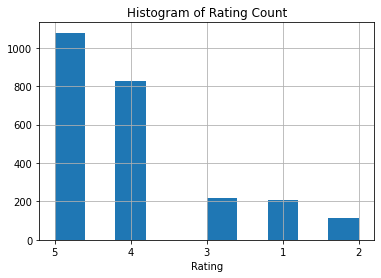

In [15]:
import matplotlib.pyplot as plt

df['Rating'].hist()
plt.xlabel("Rating")
plt.title("Histogram of Rating Count")
plt.show()

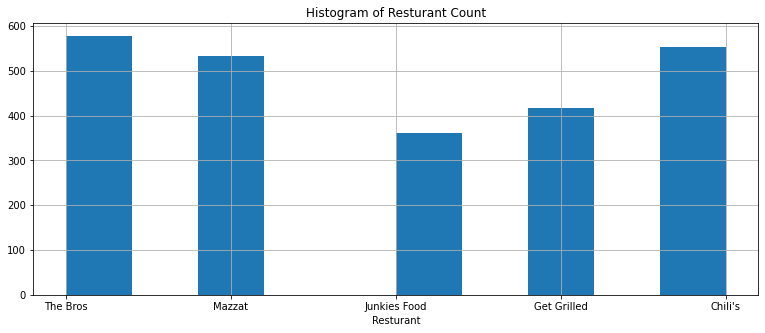

In [16]:
df['Resturant'].hist(figsize=(13,5))
plt.xlabel("Resturant")
plt.title("Histogram of Resturant Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


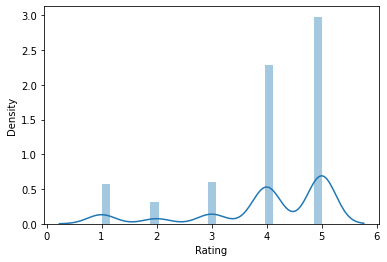

In [21]:
sns.distplot(df["Rating"])